<Axes: xlabel='x', ylabel='y'>

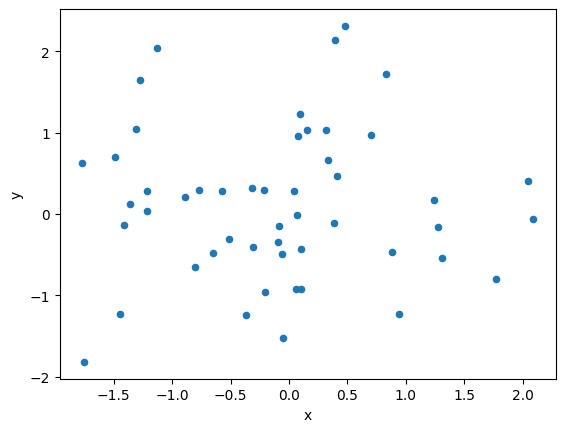

In [2]:
import pandas as pd
import numpy as np

np.random.seed(2020)

one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})
one_df.plot.scatter(x="x", y="y")

<Axes: xlabel='x', ylabel='y'>

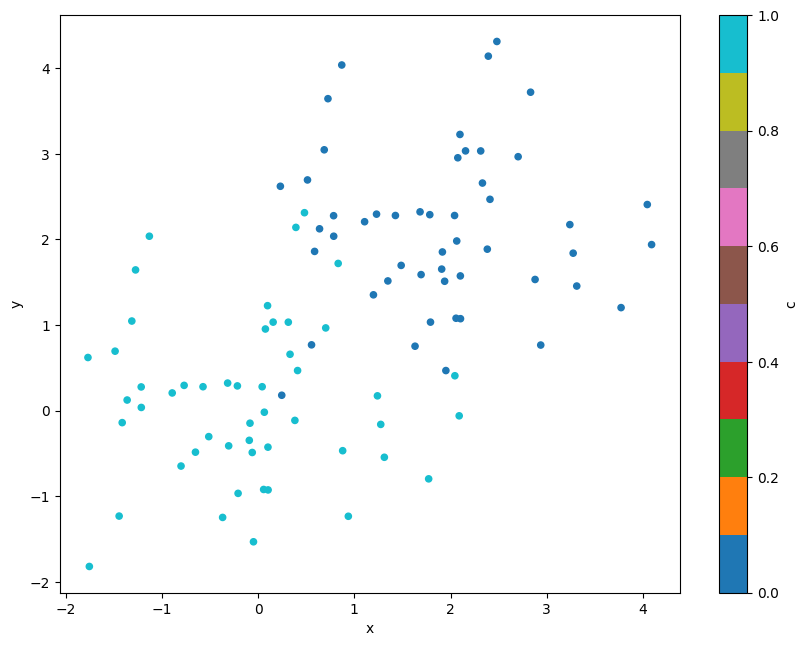

In [3]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 2).assign(c=0),
])

blobs_df.plot.scatter(x="x", y="y", c="c", cmap="tab10", figsize=(10, 7.5))

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 25, 10, 8, 8, 6),
                    activation="tanh", max_iter=100000)
mlp.fit(blobs_df.drop(columns="c"), blobs_df["c"])

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 25, 10, 8, 8, 6),
              max_iter=100000)

In [6]:
x_test = np.linspace(-2, 5, 1000)
y_test = np.linspace(-2, 5, 1000)

In [7]:
xx, yy = np.meshgrid(x_test, y_test)

In [8]:
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt

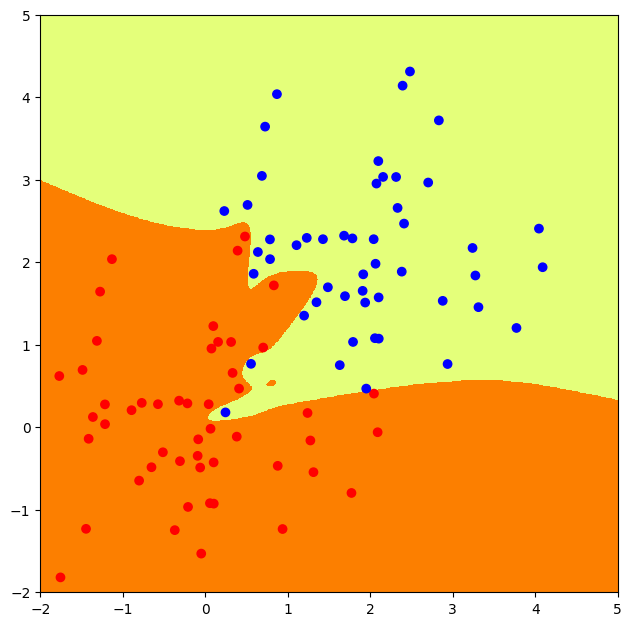

In [11]:
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 5, -2, 5), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="bwr")

Model który stworzyliśmy, jest prawdopodobnie przeuczony, jednak dobierając odpowiednio parametry sieci, takie jak liczba warstw uczących oraz funkcja aktywacji, jesteśmy w stanie sterować zachowaniem powstałej funkcji decyzyjnej, a metody walidacji krzyżowej pomogą nam sprawdzić czy nie nastąpiło przeuczenie.